## Lab 2: Clustering ##
INFO 254

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

#%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('yelp_reviewers.csv')
print(df.shape)
df.dropna().describe()

(171639, 43)


,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,...,q16r,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
count,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,...,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000
mean,6.673497,5.532121,4.990002,9.002644,1.507177,0.930915,0.863740,1.540158,26.765398,25.708965,...,3.633588,0.460916,22.550671,25.064697,0.003781,73.981978,0.642677,0.561124,1.141080,3.649456
std,7.468561,25.407165,22.812399,28.164931,0.889274,0.980001,0.951531,1.027086,10.166944,11.569436,...,1.490942,0.509305,14.454279,28.650883,0.006020,51.060694,1.427017,1.908011,3.234828,0.990191
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.780000,1.410000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,0.690000,0.000000,0.000000,0.690000,20.000000,16.670000,...,3.000000,0.000000,10.000000,9.000000,0.000477,39.125000,0.000000,0.000000,0.000000,3.200000
50%,5.000000,2.000000,2.000000,5.000000,1.610000,0.690000,0.690000,1.610000,25.930000,25.000000,...,4.000000,0.333333,21.000000,17.000000,0.001944,61.842593,0.000000,0.000000,0.500000,3.800000
75%,8.000000,4.000000,4.000000,9.000000,2.080000,1.390000,1.390000,2.200000,33.330000,33.330000,...,5.000000,0.666667,34.000000,32.000000,0.004666,95.375000,1.000000,0.000000,1.333333,4.333333
max,360.000000,2333.000000,2093.000000,2420.000000,5.890000,7.750000,7.650000,7.790000,84.620000,89.290000,...,5.000000,7.000000,53.000000,1289.000000,0.150618,549.333333,44.000000,106.000000,342.300000,5.000000


### Question 1 ###

Choose an implementation of k-means and specify it in the google sheet  

** Answer **:  


In [5]:
from sklearn.cluster import KMeans # Scikit-learn


### Question 2 ###
What is the best choice of k according to the silhouette metric for clustering q4-q6 (# of cool, funny, useful votes). Only consider 2 <= k <= 8.  

NOTE: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder. This can be accomplished in MATLAB, for example, with the command:  [IDX,C]=kmeans(d,4, 'Distance', 'sqeuclidean','EmptyAction','singleton')

**Answer**:  

In [96]:
current_max, current_index = float("-inf"),-1
#new_df = df.dropna().sample(n = 10000)   # Sampling 10000 data points randomly since the whole dataset is too large to load
#print(type(new_df))  # Dataframe
#b = [1,3,5]
#print(df.iloc[:,b])

for k in range(2,9):
    kmeans = KMeans(n_clusters = k).fit(df.iloc[:, 1:4])
    s_score = silhouette_score(df.iloc[:,1:4], kmeans.labels_, sample_size = 10000)
    if s_score > current_max:
        current_max = s_score
        current_index = k

print("Best choice: k = ", current_index, ", silhouette score = ", current_max)




Best choice: k =  2 , silhouette score =  0.98939672069


***

### Question 3 ###
Answer question 2 but using the log of the features (q7-q10)

**Answer**:  

In [7]:
# I had taken log of the features q7-q10 in this code.

"""

from sklearn.preprocessing import Imputer

col_loc = new_df.columns.get_loc('q7')
#new_df.iloc[:,col_loc:(col_loc+4)].head()

log_new_df = np.log(new_df.iloc[:,col_loc:(col_loc+4)])
log_new_df[log_new_df == float('-inf')] = float('nan')
#print(log_new_df.head())
imputer = Imputer()
log_new_df = imputer.fit_transform(log_new_df) # It is an array now
#print(log_new_df[:5])



current_max, current_index = float("-inf"),-1
for k in range(2,9):
    kmeans = KMeans(n_clusters = k).fit(log_new_df)
    s_score = silhouette_score(log_new_df, kmeans.labels_)
    if s_score > current_max:
        current_max = s_score
        current_index = k
print("Best choice: k = ", current_index)

"""

'\n\nfrom sklearn.preprocessing import Imputer\n\ncol_loc = new_df.columns.get_loc(\'q7\')\n#new_df.iloc[:,col_loc:(col_loc+4)].head()\n\nlog_new_df = np.log(new_df.iloc[:,col_loc:(col_loc+4)])\nlog_new_df[log_new_df == float(\'-inf\')] = float(\'nan\')\n#print(log_new_df.head())\nimputer = Imputer()\nlog_new_df = imputer.fit_transform(log_new_df) # It is an array now\n#print(log_new_df[:5])\n\n\n\ncurrent_max, current_index = float("-inf"),-1\nfor k in range(2,9):\n    kmeans = KMeans(n_clusters = k).fit(log_new_df)\n    s_score = silhouette_score(log_new_df, kmeans.labels_)\n    if s_score > current_max:\n        current_max = s_score\n        current_index = k\nprint("Best choice: k = ", current_index)\n\n'

In [95]:
from sklearn.preprocessing import Imputer

col_loc = df.columns.get_loc('q7')


log_df = df.iloc[:,col_loc:(col_loc+4)]
log_df[log_df == float('-inf')] = float('nan')
#print(log_new_df.head())
imputer = Imputer()
log_df = imputer.fit_transform(log_df) # It is an array now
#print(log_new_df[:5])



current_max, current_index = float("-inf"),-1
for k in range(2,9):
    kmeans = KMeans(n_clusters = k).fit(log_df)
    s_score = silhouette_score(log_df, kmeans.labels_, sample_size = 10000)
    if s_score > current_max:
        current_max = s_score
        current_index = k
print("Best choice: k = ", current_index, ", silhouette score = ", current_max)

Best choice: k =  2 , silhouette score =  0.525805639106


In [7]:
#new_df.iloc[:,col_loc:(col_loc+4)].head()

***

### Question 4 ###
Answer question 2 but using the percentage of the features (q11-q13)

**Answer**:

In [20]:
# Here again, I took the percentage of each column w.r.t the sum of all the 3 columns

"""
col_loc = new_df.columns.get_loc('q11')
new_df_slice = new_df.iloc[:,col_loc:(col_loc+3)]
sum_across_cols = new_df_slice.sum(axis=1) # Axis of repeat isn't supported in pandas' implememtation of repeat


#print(type(sum_across_cols))   # Series
#print(np.repeat(sum_across_cols, 3, axis =1).shape)
#percent_new_df = np.divide(, np.repeat(sum_across_cols, 3, axis=1))*100

for i in range(len(new_df_slice.iloc[0])):      # new_df_slice[:1] wasn't giving the desired results, think why
    new_df_slice.iloc[:,i] = np.divide(new_df_slice.iloc[:,i], sum_across_cols)*100
#new_df_slice.describe()

current_max, current_index = float("-inf"),-1
for k in range(2,9):
    kmeans = KMeans(n_clusters = k).fit(new_df_slice)
    s_score = silhouette_score(new_df_slice, kmeans.labels_)
    if s_score > current_max:
        current_max = s_score
        current_index = k
print("Best choice: k = ", current_index)
"""

(10000,)
Best choice: k =  8


In [51]:
col_loc = df.columns.get_loc('q11')
df_slice = df.iloc[:,col_loc:(col_loc+3)]

imputer = Imputer()
df_slice = imputer.fit_transform(df_slice)
current_max, current_index = float("-inf"),-1
for k in range(2,9):
    kmeans = KMeans(n_clusters = k).fit(df_slice)
    s_score = silhouette_score(df_slice, kmeans.labels_, sample_size = 10000)
    if s_score > current_max:
        current_max = s_score
        current_index = k
print("Best choice: k = ", current_index)

Best choice: k =  8


***

### Question 5 ###
Inspect the [best] clustering generated from question 4

#### 5.a ####
**Question**: List the number of data points in each cluster (eg. C1: 2,000 C2: 4,200 etc)

In [52]:
kmeans = KMeans(n_clusters = current_index).fit(df_slice)

from collections import Counter
cnt = Counter()
for label in kmeans.labels_:
    cnt[label]+=1
for item in sorted(cnt.items(), key = lambda x: x[0]): # item is (key,value)
    print("C"+str(item[0]),":",item[1], end = ", ")
#print(sorted(cnt, key = lambda x:)

C0 : 8677, C1 : 14865, C2 : 86641, C3 : 5805, C4 : 4026, C5 : 10188, C6 : 32922, C7 : 8515, 

#### 5.b ####
**Question**: Were there clusters that represented very funny but useless reviewers?  

**Answer**:  

In [54]:
print(kmeans.cluster_centers_)


[[ 26.35629771   1.56193359  72.08165802]
 [ 32.79166095  33.46908443  33.73584191]
 [ 19.21344078  18.71325288  62.07314944]
 [  1.36427907  97.08347976   1.55237037]
 [ 98.20565574   0.89977894   0.894615  ]
 [ 49.12774441   2.46021692  48.41214861]
 [  0.17617186   0.40948758  99.41432112]
 [  2.01080446  46.42119789  51.56799883]]


From the coordinates of the cluster centers, we see that cluster 3 (in this case, the exact label could vary depending on initializations etc.) has only about 1.5% from useful votes and about 97% from funny votes. Instead of just looking at the cluster centers and saying this (which would be hard if there were many centers, we could also have a threshold, say 80%, for the difference between the percentages of funny and useful votes and return all clusters for which the threshold is exceeded.

#### 5.c ####
**Question**: How many reviewers were in the cluster that represented relatively equal strength in all voting categories (assuming such a cluster exists in your clustering)?  

**Answer**:

In [55]:
latest_cluster = -1 # The latest cluster that satisfies the required criteria
for i,centers in enumerate(kmeans.cluster_centers_):
    if max(centers)-min(centers)<10:  # some heuristic threshold
        latest_cluster = i
if latest_cluster == -1:
    print("No such cluster found")
else:
    print("The number of reviewers in the cluster that represented relatively equal strength in all voting categories: ",cnt[latest_cluster])
        
# We could also have eyeballed it in this case since we see that cluster 6 has almost equal coordinates, but my code is more general, ofcourse with the caveat of having to select the threshold       

The number of reviewers in the cluster that represented relatively equal strength in all voting categories:  14865


***

### Question 6 ###
Cluster the dataset using $k = 5$ and using features q7-q13 (log and % type votes) and q14 (most active year feature) and the natural log of q15 (avg review chars)

In [57]:
col_loc = df.columns.get_loc('q7')
q6_df = df.iloc[:,col_loc:(col_loc+8)]   #q6 refers to question 6 here, not some feature
#new_df.iloc[:,new_df.columns.get_loc('q15')]
q6_df = q6_df.join(pd.DataFrame(np.log(df.iloc[:,df.columns.get_loc('q15')]))) 
imputer = Imputer()
q6_df = imputer.fit_transform(q6_df)

kmeans = KMeans(n_clusters = 5).fit(q6_df)

#### 6.a ####
**Question**: What is the silhouette metric for this clustering?   
You may use the max, as you did in question 2. For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [58]:
s_score = silhouette_score(q6_df, kmeans.labels_, sample_size = 10000)
print("The silhouette metric for this clustering is: ", s_score)

The silhouette metric for this clustering is:  0.648573840098


#### 6.b ####
**Question**: What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters (eg. C1: 1.4 C2: 4.2 C3: 3.4 etc)

In [60]:
dict1 = {}
#for i in range(5):
#    dict1[i] = list()
#print(kmeans.labels_[9999])
#print([new_df.iloc[9999,new_df.columns.get_loc('q3')]])
#print()

for i in range(len(df)):
    if kmeans.labels_[i] in dict1:
        dict1[kmeans.labels_[i]].append(df.iloc[i,df.columns.get_loc('q3')])
    else:
        dict1[kmeans.labels_[i]] = ([df.iloc[i,df.columns.get_loc('q3')]])
#print(dict1.keys())
for key in sorted(dict1.keys()):
    print("C"+str(key),":",np.mean(np.array(dict1[key])), end =", ")


C0 : 5.13274199769, C1 : 2.87911339962, C2 : 2.67239955971, C3 : 2.85209182152, C4 : 2.60288629012, 

***

### Question 7 ###
Cluster the dataset using the features described in question 6 + every group’s question 16 features (you may drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [20]:
from sklearn.preprocessing import MinMaxScaler
col_loc = df.columns.get_loc('q7')
q6_df = df.iloc[:,col_loc:(col_loc+8)]   #q6 refers to question 6 here, not some feature
q6_df = q6_df.join(pd.DataFrame(np.log(df.iloc[:,df.columns.get_loc('q15')])))
q7_df = pd.DataFrame(q6_df).join(df.iloc[:,df.columns.get_loc('q16a'):])
#print(q7_df.shape)
#print(q7_df.head())
#print(q7_df['q8'].isnull().sum())

d = {}
for col in q7_df.columns:
    d[col] = np.sum(q7_df[col].isnull().sum())
print(d)


{'q7': 0, 'q8': 117853, 'q9': 122162, 'q10': 81153, 'q11': 71282, 'q12': 71282, 'q13': 71282, 'q14': 0, 'q15': 0, 'q16a': 0, 'q16b': 0, 'q16c': 0, 'q16d': 0, 'q16e': 0, 'q16f': 0, 'q16g': 0, 'q16h': 0, 'q16i': 0, 'q16j': 0, 'q16k': 0, 'q16l': 0, 'q16m': 0, 'q16n': 0, 'q16o': 0, 'q16p': 0, 'q16q': 0, 'q16r': 0, 'q16s': 0, 'q16t': 0, 'q16u': 0, 'q16v': 0, 'q16w': 0, 'q16x': 0, 'q16y': 0, 'q16z': 0, 'q16aa': 0, 'q16ab': 47594, 'q16ac': 0}


It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columnsbefore removing any columns

In [21]:
#print(q7_df.columns)
del q7_df['q8']   # Could also do df.drop
del q7_df['q9']



By removing 2 features, we double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [22]:
q7_df = q7_df.dropna() # Till now I have been imputing and not dropping the NaN values, but siunce this question refers to dropping NaN, I have done so here
list_of_types = []
for col in q7_df.columns:
    list_of_types.append(q7_df[col].dtype)
print(set(list_of_types))

for col in q7_df.columns:
    if q7_df[col].dtype == 'O':
        cats = set(q7_df[col])
        #print(cats)
        count = 0
        d = {}
        for elt in cats:
            d[elt] = count
            count+=1
        #print(d)
        #break
        new_q7 = []
        for elt in q7_df[col]:
            new_q7.append(d[elt])
        q7_df[col]=new_q7
            
print(q7_df.head())           

{dtype('float64'), dtype('int64'), dtype('O')}
     q7   q10   q11   q12    q13  q14       q15  q16a      q16b      q16c  \
1  1.10  0.00   0.0   0.0  100.0    9  5.030438     0  0.577350  0.002179   
3  1.10  0.00   0.0   0.0  100.0   10  6.219934     1  2.309401  0.000663   
5  1.10  1.10   0.0   0.0  100.0    9  5.950643     0  2.309401  0.002604   
6  2.08  1.79  25.0   0.0   75.0    9  6.013104     5  1.995531  0.002446   
9  0.69  0.00   0.0  50.0   50.0    9  5.898527     1  2.121320  0.002743   

     ...     q16t  q16u  q16v  q16w      q16x       q16y  q16z  q16aa  \
1    ...        1   1.0    19    14  0.000000  21.833333     1      0   
3    ...        1   0.0     8    11  0.002242  61.500000     0      0   
5    ...        1   0.0    27    11  0.005814  41.000000     0      0   
6    ...        0   0.5     1    27  0.006479  42.156250     0      0   
9    ...        1   0.5    31     7  0.000000  56.750000     0      0   

      q16ab     q16ac  
1  0.333333  4.666667  
3  

Now normalize the remaining features.

In [23]:
cols = q7_df.columns
scaler = MinMaxScaler()
scaler.fit(q7_df)
q7_df = pd.DataFrame(scaler.transform(q7_df), columns = cols)
#q7_df = pd.DataFrame(normalize(q7_df, axis = 0))
q7_df.head()

,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,...,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
0,0.186757,0.000000,0.000000,0.000000,1.000000,0.833333,0.511036,0.0,0.204124,0.000654,...,1.0,0.111111,0.346154,0.010093,0.000000,0.031555,0.022727,0.0,0.000974,0.916667
1,0.186757,0.000000,0.000000,0.000000,1.000000,0.916667,0.677844,0.1,0.816497,0.000187,...,1.0,0.000000,0.134615,0.007764,0.005809,0.089547,0.000000,0.0,0.000974,0.666667
2,0.186757,0.141207,0.000000,0.000000,1.000000,0.833333,0.640080,0.0,0.816497,0.000784,...,1.0,0.000000,0.500000,0.007764,0.015063,0.059576,0.000000,0.0,0.002921,0.666667
3,0.353141,0.229782,0.267867,0.000000,0.738083,0.833333,0.648840,0.5,0.705527,0.000736,...,0.0,0.055556,0.000000,0.020186,0.016786,0.061266,0.000000,0.0,0.002921,0.593750
4,0.117148,0.000000,0.000000,0.559973,0.476166,0.833333,0.632772,0.1,0.750000,0.000827,...,1.0,0.055556,0.576923,0.004658,0.000000,0.082602,0.000000,0.0,0.002921,0.625000


#### 7.a ####
**Question**: Using the silhouette metric, what was the best k?  

**Answer**:  

In [24]:
current_max, current_index = float("-inf"),-1
sse = []
for k in range(2,9):
    kmeans = KMeans(n_clusters = k).fit(q7_df)
    sse.append(kmeans.inertia_)
    s_score = silhouette_score(q7_df, kmeans.labels_, sample_size = 10000)
    if s_score > current_max:
        current_max = s_score
        current_index = k

print("Best choice: k = ", current_index, ", silhouette score = ", current_max)

Best choice: k =  2 , silhouette score =  0.232197223377


#### 7.b ####
**Question**: Using the the sum of within cluster variance metric with the elbow method what was the best k?  
**Answer**:  

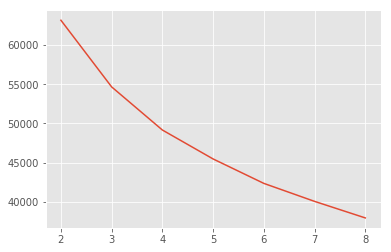

In [25]:
k = range(2,9)
plt.plot(k,sse)
plt.show()

By the elbow method, it is seen that maximum slope change occurs at k=3.

### Question 8 ###
For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. This question answer should be submitted to a bCourses assignment in the form a pdf. This report is expected to be between 2 and 3 pages. It is meant to give you practice writing up your results. The report should have the following sections:


RESEARCH QUESTION: Describe what it is you want to ask of this dataset
                 (the question can not be the same as question 9)
                 
                 
DATASET: describe the yelp_reviews to yelp_reviewers transformation. have a subsection called FEATURES SELECTED: briefly describe the features from the dataset you choose (at least 1 features should be from a q16)


METHODS: Briefly describe the methods you used (such as k-means) and why you used them


RESULTS: Here you can tell the story of how you investigated the question (plots are always nice) and the conclusions you drew.


NOTE: If you are hypothesizing that clusters might be formed with respect to a particular attribute, consider withholding that attribute from clustering and then looking to see what the mean value or distribution of that attribute is among the formed clusters.

In [ ]:
#I have submitted the pdf and a separate Ipython notebook for this titled Lab2 Q8.ipynb.

## Bonus question (+15%) - Reviewer overlap:
Create a dataset with f reviewers as the rows and business_ids as the columns (there are a lot) where the feature value is is ‘1’ if the reviewer has written a review for that business and ‘0’ if not. Use the methods described in this assignment to answer the question of how much overlap of businesses reviewed exists among reviewers in this dataset. Append this answer to your question 8 document.

In [1]:
# Attached after Q8

